# Intuitive Bayes Lesson 2: Bayesian AB testing

In this lesson, we looked at the example of estimating conversion rates, which is important for AB testing.

In [4]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("poster")
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
import pymc as pm
import arviz as az
import numpy
import pymc

np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}%".format(x)})

In [2]:
np.random.seed(3)

## Generate data

First we generate data to get our conversions. While in the lesson we only look at conversions for one of the two versions of the website, here we will generate data for both. We use a Bernoulli with a true conversion rate of 10% for A and 15% for B.

In [3]:
a = sps.bernoulli(p=.1)
b = sps.bernoulli(p=.15)

conversions = a_conversions = a.rvs(100)
b_conversions = b.rvs(100)

In [5]:
conversions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [6]:
b_conversions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

Here we compute the conversion probability. The `mean` on binary data gives us the percentage of ones, so 7% for A.

In [7]:
numpy.mean(conversions)

0.07

In [8]:
np.mean(b_conversions)

0.17

## Build conversion rate model

Next, we import `pymc` (4.0) and build our conversion rate model feeding in conversion data for version A of the website.

In [ ]:
import pymc

with pymc.Model():
    # parameter we want to infer with prior
    conversion_rate = pymc.Beta("conversion_rate", 2, 10)
    # likelihood of observing data given parameter
    likelihood = pymc.Bernoulli("likelihood", 
                                p=conversion_rate, 
                                observed=conversions)
    
    # Hit inference button (TM)
    idata = pymc.sample()

## Model analysis

We will discuss this in more detail in the next lessons but `sample()` returns an `InferenceData` object which we can inquire in various ways. Here we extract the values for the `conversion_rate` parameter.

In [21]:
conversion_a = idata.posterior.stack(draws=("chain", "draw"))["conversion_rate"].values

In [22]:
np.round(100 * conversion_a, 2)[:200]

array([7.9%, 6.5%, 5.8%, 9.9%, 6.4%, 9.0%, 9.0%, 9.1%, 9.1%, 10.2%, 8.3%,
       10.0%, 9.8%, 12.8%, 8.4%, 8.4%, 8.5%, 7.3%, 6.4%, 10.1%, 9.0%,
       11.3%, 12.0%, 9.6%, 10.2%, 7.8%, 10.5%, 8.9%, 10.8%, 8.7%, 8.5%,
       8.5%, 7.7%, 5.3%, 4.3%, 6.4%, 8.3%, 7.5%, 8.7%, 8.7%, 5.7%, 5.3%,
       4.3%, 5.5%, 7.2%, 7.2%, 7.1%, 7.0%, 6.4%, 9.5%, 9.6%, 9.6%, 9.0%,
       8.1%, 8.1%, 8.1%, 8.4%, 7.8%, 13.1%, 9.9%, 5.7%, 7.5%, 12.7%, 9.4%,
       10.4%, 11.8%, 11.1%, 10.7%, 3.7%, 11.1%, 9.0%, 10.5%, 9.6%, 10.9%,
       10.7%, 9.1%, 6.9%, 5.9%, 3.8%, 5.5%, 6.8%, 7.4%, 8.0%, 6.2%, 4.4%,
       6.9%, 5.6%, 4.7%, 6.2%, 4.9%, 6.0%, 6.6%, 6.8%, 7.3%, 3.0%, 2.8%,
       7.8%, 7.8%, 10.3%, 8.2%, 13.3%, 13.3%, 4.7%, 4.7%, 4.7%, 10.0%,
       6.1%, 5.6%, 15.8%, 2.6%, 1.9%, 2.7%, 3.7%, 5.2%, 5.1%, 12.3%, 9.7%,
       8.0%, 4.3%, 6.3%, 6.6%, 4.5%, 6.2%, 6.2%, 6.2%, 4.4%, 8.1%, 8.7%,
       10.8%, 7.6%, 7.6%, 8.5%, 8.5%, 9.6%, 6.8%, 9.5%, 9.7%, 10.1%,
       10.0%, 5.0%, 5.9%, 2.8%, 8.4%, 8.4%, 8.4%, 7.1%

Generate a histogram of plausible values.

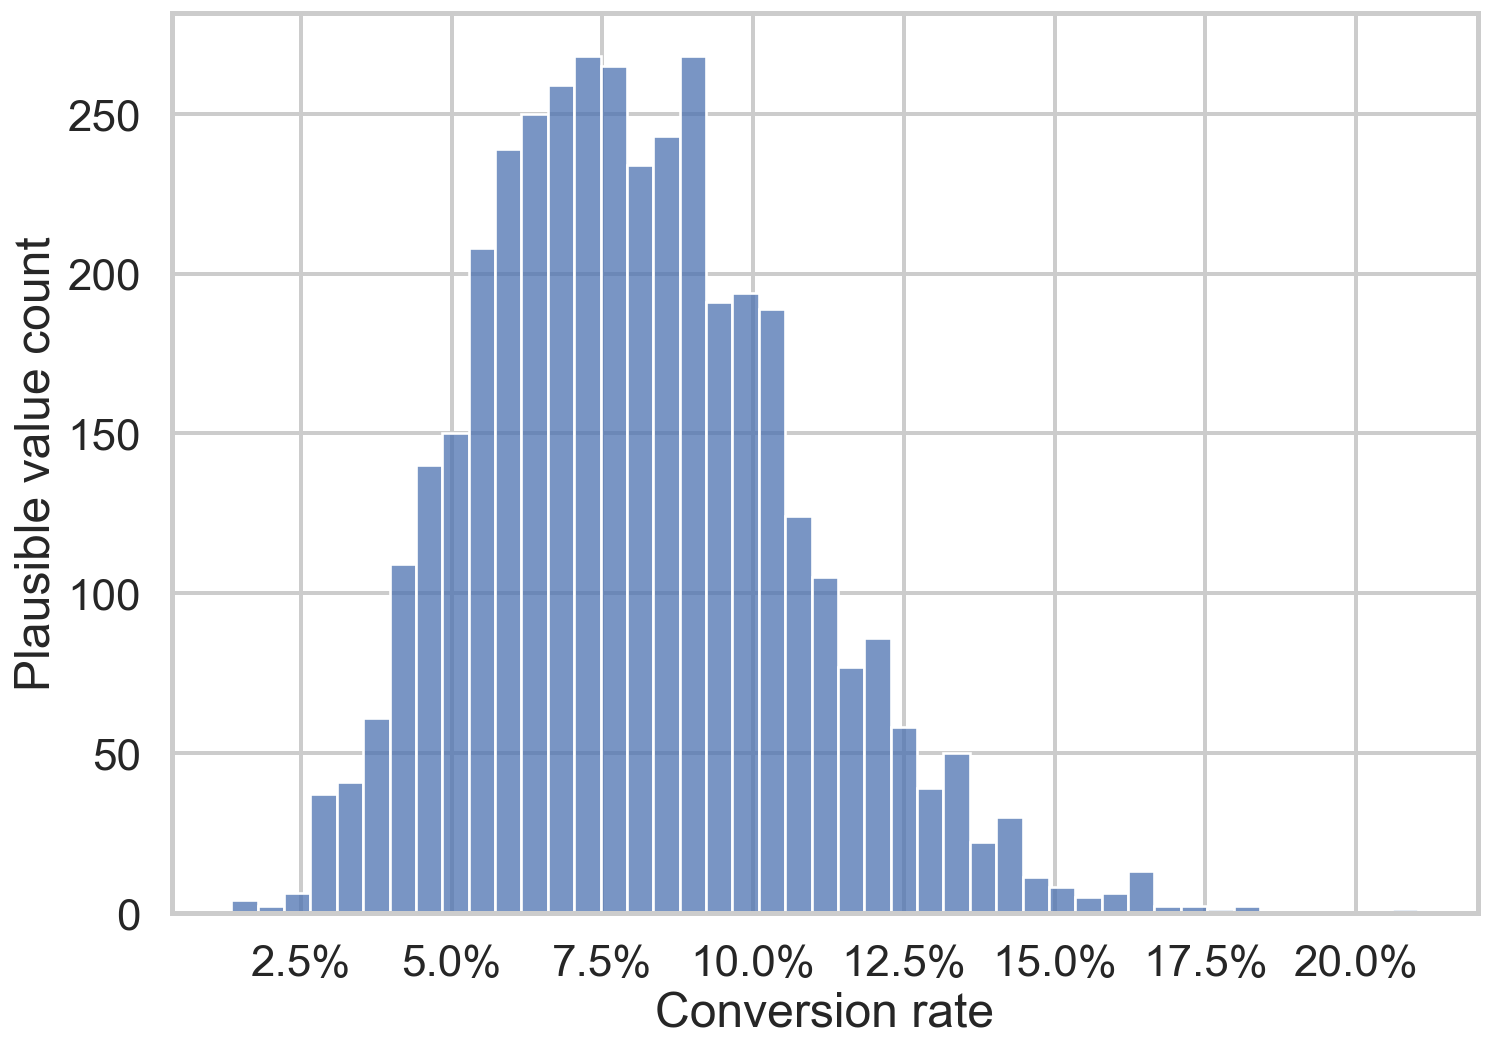

In [23]:
ax = sns.histplot(conversion_a)
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

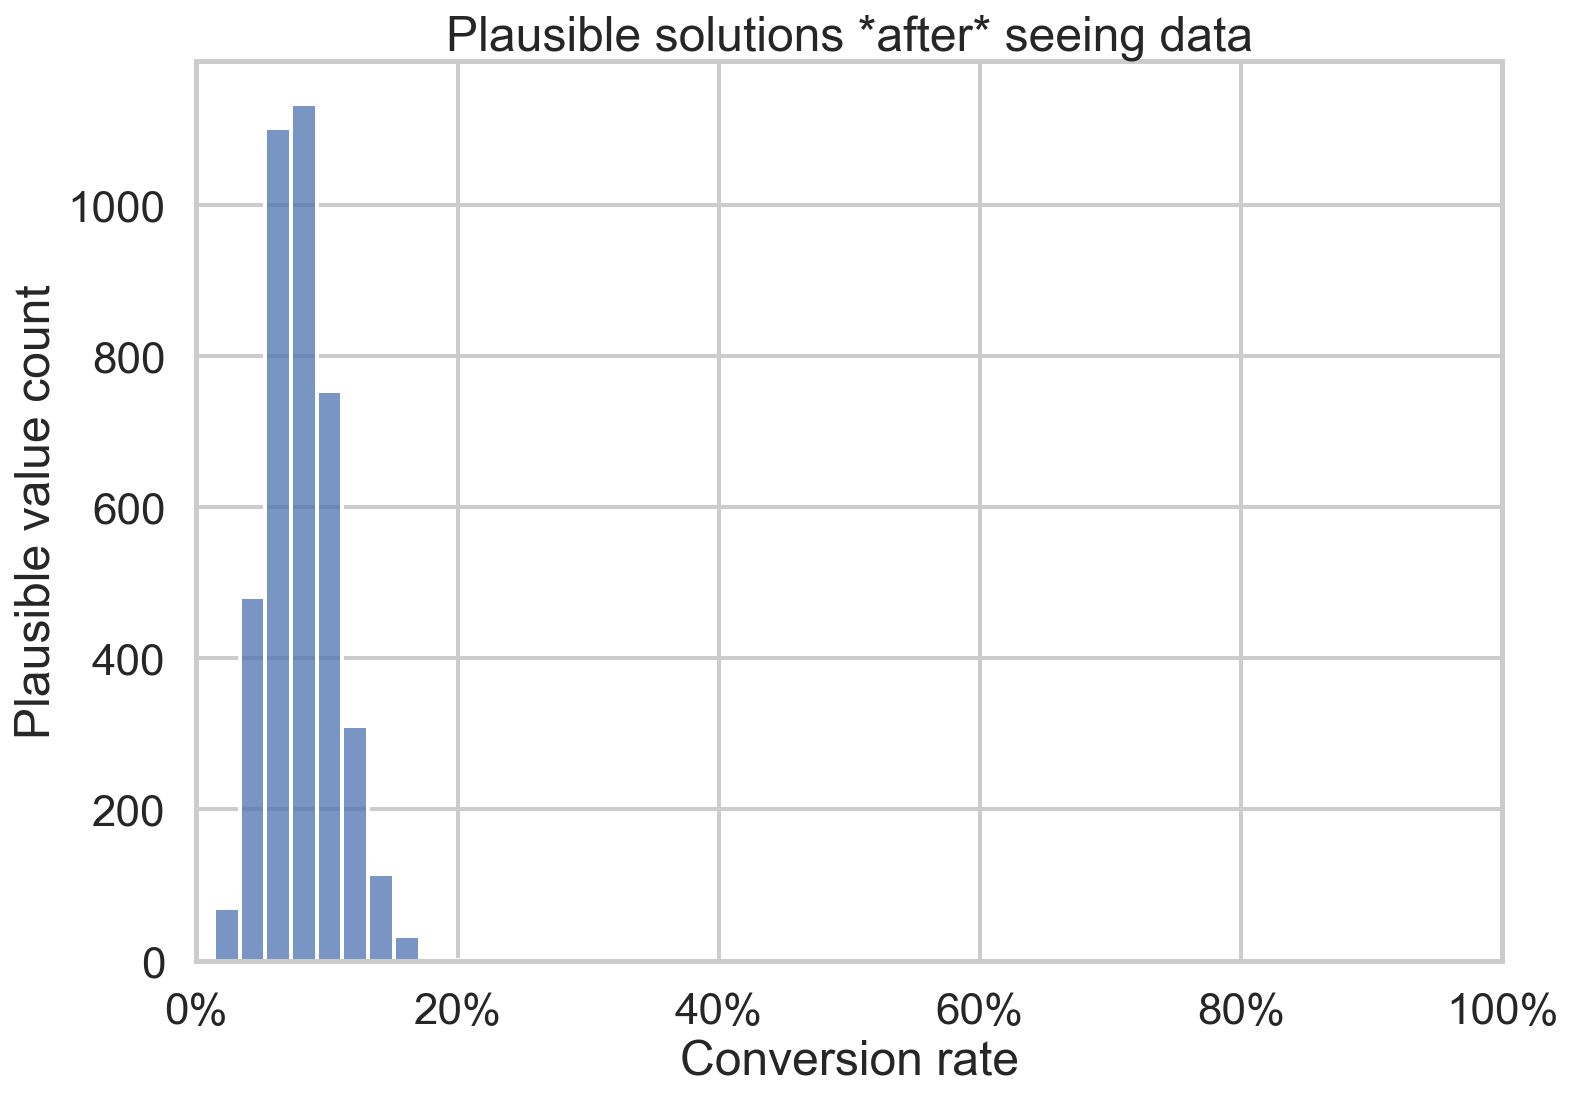

In [27]:
ax = sns.histplot(conversion_a, bins=10)
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")
ax.set_xlim(0, 1)
ax.set_title("Plausible solutions *after* seeing data")

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

If we want to ask questions about our posterior, we can just slice into our posterior according to the question we want to ask (here, how plausible it is to have a conversion rate > 10%).

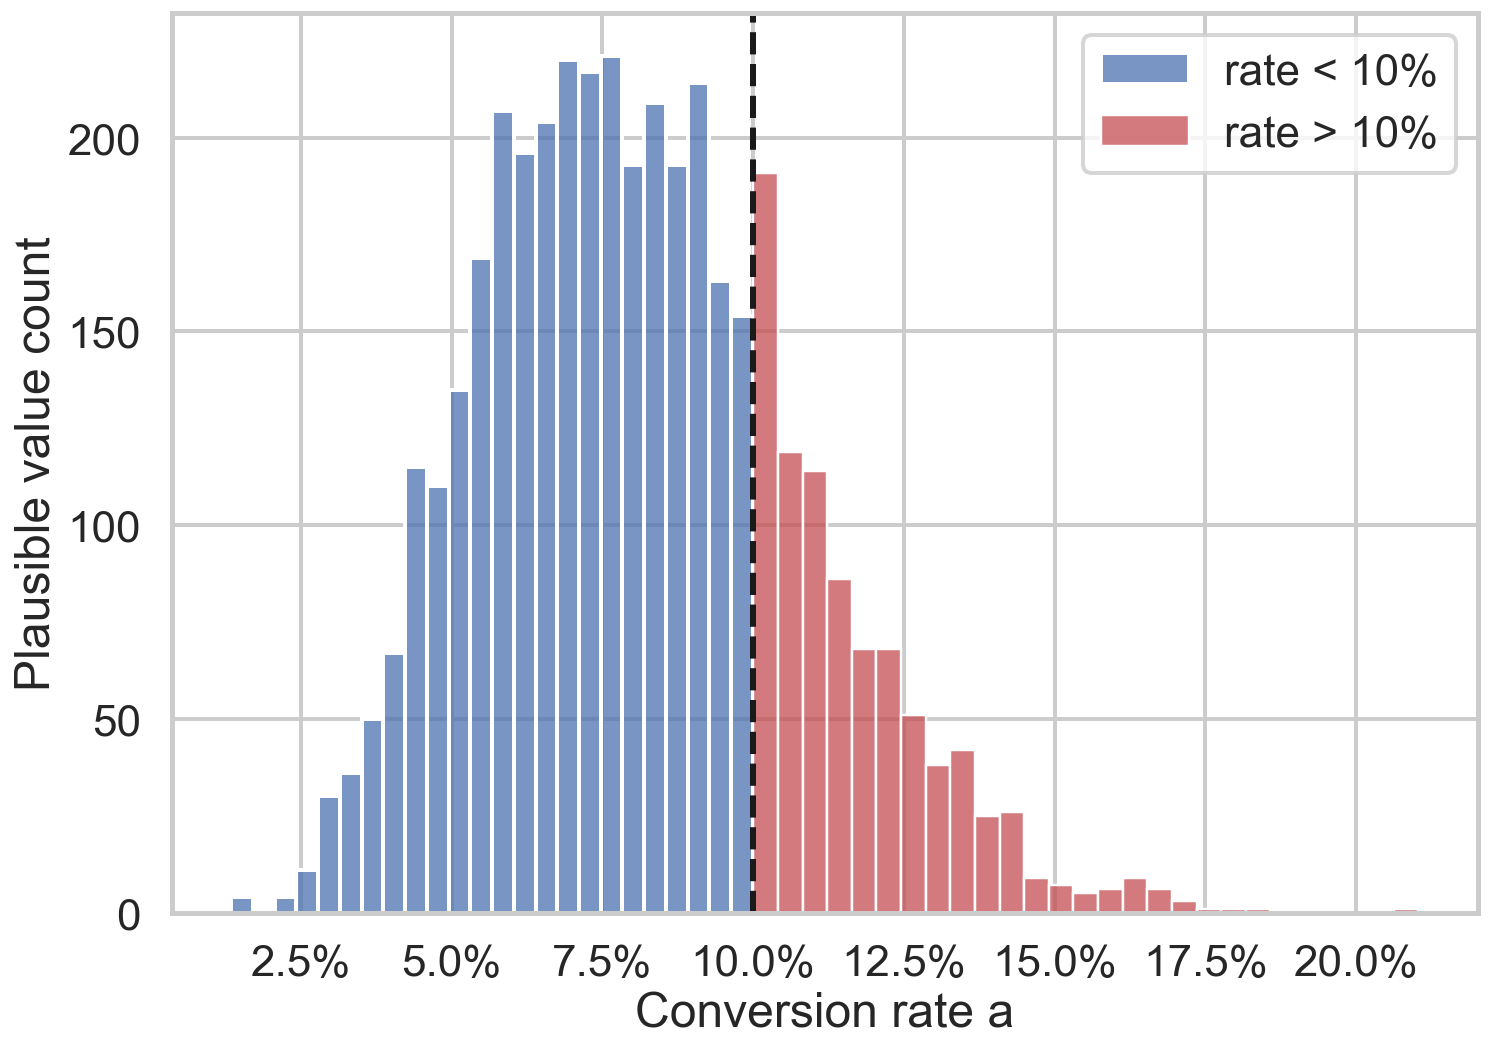

In [28]:
ax = sns.histplot(conversion_a[conversion_a < .1], label="rate < 10%")
sns.histplot(conversion_a[conversion_a > .1], color="r", label="rate > 10%", ax=ax)
ax.set_xlabel("Conversion rate a")
ax.set_ylabel("Plausible value count")
ax.axvline(.1, color="k", ls="--")
ax.legend()

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

If we want to compute the actual probability of this statement being true, we can just count the number of plausible values that match our question:

In [30]:
conversion_a < .1

array([ True,  True,  True, ...,  True, False,  True])

Again, the mean gives us the probability, i.e. the proportion of plausible values for which the statement is true.

In [31]:
np.mean(conversion_a < .1)

0.79775

## Misc

In [11]:
# Generate samples from the artificial sampler
np.round(np.random.random(200), 2) * 105 - 10

array([16.2%, 15.2%, 18.4%, 17.3%, 91.8%, 73.0%, 83.5%, 64.5%, 26.8%,
       88.7%, 40.4%, 9.9%, 66.6%, 17.3%, 76.1%, 67.7%, 20.4%, 38.3%,
       65.6%, 60.4%, 45.7%, 12.1%, 23.6%, 62.4%, 38.3%, 65.6%, 61.4%,
       27.8%, 0.5%, 61.4%, 27.8%, 48.8%, 2.6%, 5.8%, 34.1%, 60.4%, 2.6%,
       70.9%, 79.2%, 60.4%, 68.8%, 15.2%, 0.5%, 24.6%, 3.7%, 34.1%, 69.8%,
       19.4%, 80.3%, 37.2%, 6.8%, 57.2%, 36.2%, 24.6%, 44.6%, 94.0%,
       68.8%, 20.4%, 87.7%, 8.9%, 33.0%, 28.9%, 94.0%, -10.0%, 58.2%,
       43.6%, 6.8%, 57.2%, 75.1%, 70.9%, -1.6%, 74.0%, 26.8%, 79.2%,
       48.8%, -1.6%, 67.7%, 48.8%, 37.2%, 57.2%, 36.2%, -5.8%, 85.5%,
       20.4%, 19.4%, -4.8%, 65.6%, 85.5%, 38.3%, 75.1%, 24.6%, 29.9%,
       20.4%, 20.4%, 48.8%, 24.6%, -2.6%, 62.4%, 22.5%, 31.0%, 9.9%,
       -4.8%, 58.2%, 34.1%, 87.7%, -7.9%, 76.1%, -7.9%, 7.9%, -8.9%,
       43.6%, 26.8%, 23.6%, 91.8%, 50.9%, 87.7%, 83.5%, 25.7%, 58.2%,
       11.0%, 28.9%, 61.4%, 49.8%, -1.6%, -1.6%, 70.9%, 63.5%, 58.2%,
       13.1%, 71.

In [24]:
x = np.array([1,0,1,0])
p = .5

Code for the Bernoulli likelihood.

In [25]:
p ** (sum(x==1)) *\
(1 - p) ** (sum(x==0))

0.0625

Plot of the beta prior.

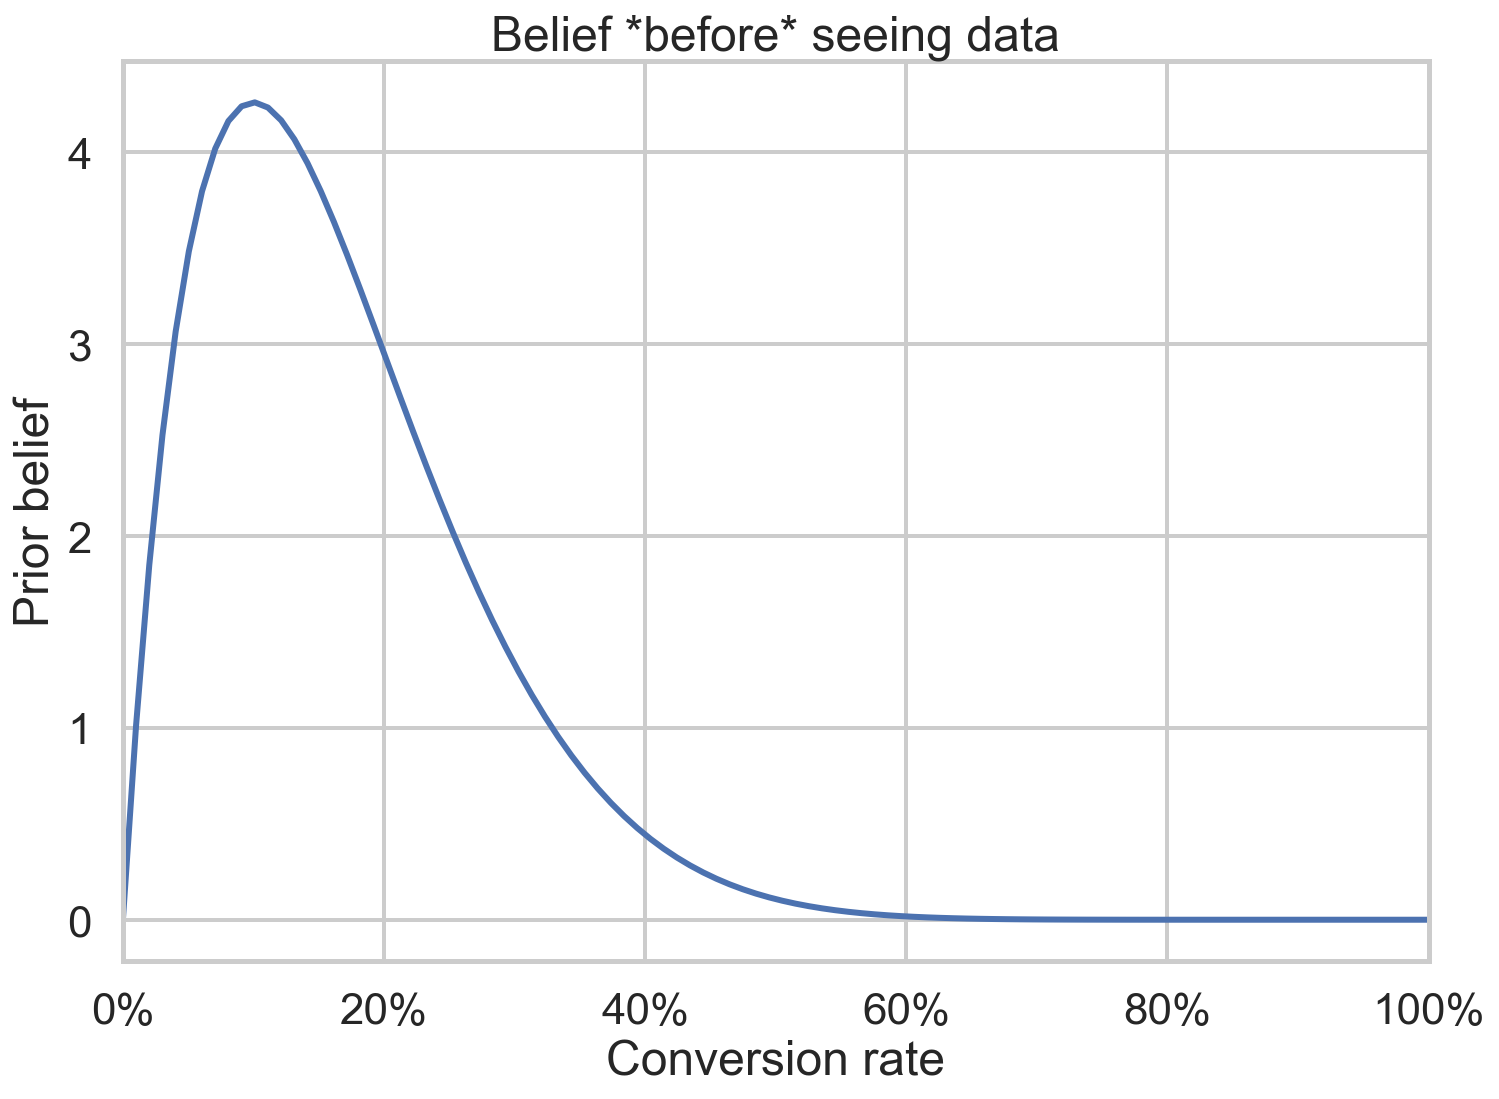

In [26]:
x1 = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
ax.plot(x1, sps.beta(2, 10).pdf(x1))
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Prior belief")
ax.set_xlim(0, 1)
ax.set_title("Belief *before* seeing data")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))